
# Teenage Healthcare Data Analysis

This project analyzes a healthcare dataset obtained from [Kaggle](https://www.kaggle.com/) to uncover patterns specifically related to **teenage patients (ages 13–19)**.

## Objectives
- Explore demographic trends (gender, blood type).
- Identify the most common medical conditions and medications.
- Analyze hospital admission patterns and billing.
- Investigate relationships between variables like blood type and condition.


### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set style
sns.set(style='whitegrid')

### 2. Load and Preview Data

In [2]:
health = pd.read_csv("C:/Users/LENOVO/Desktop/Google career/healthcare_dataset.csv")
health.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### 3. Filter for Teenagers (Ages 13–19)

In [3]:
Teens = health[(health['Age'] >= 13) & (health['Age'] <= 19)]
Teens.shape

(1693, 15)

### 4. Data Cleaning and Transformation

In [4]:
Teens['Name'] = Teens['Name'].str.title()
Teens['Date of Admission'] = pd.to_datetime(Teens['Date of Admission'])
Teens['Discharge Date'] = pd.to_datetime(Teens['Discharge Date'])
Teens['Duration'] = (Teens['Discharge Date'] - Teens['Date of Admission']).dt.days

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3144\1204721293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teens['Name'] = Teens['Name'].str.title()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3144\1204721293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teens['Date of Admission'] = pd.to_datetime(Teens['Date of Admission'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3144\1204721293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

### 5. Gender Distribution

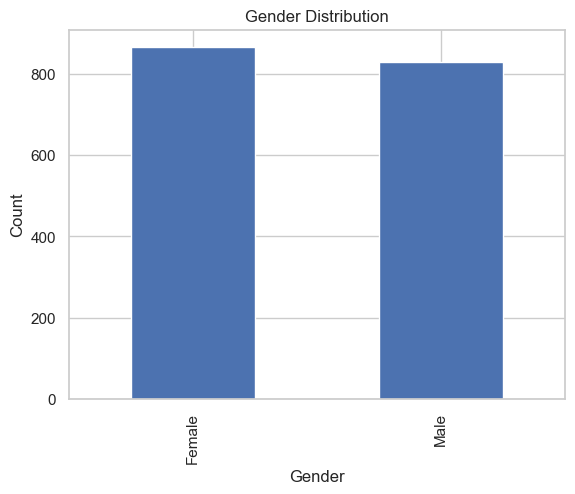

In [5]:
Teens['Gender'].value_counts().plot(kind='bar', title='Gender Distribution')
plt.ylabel('Count')
plt.show()

### 6. Most Common Medical Conditions

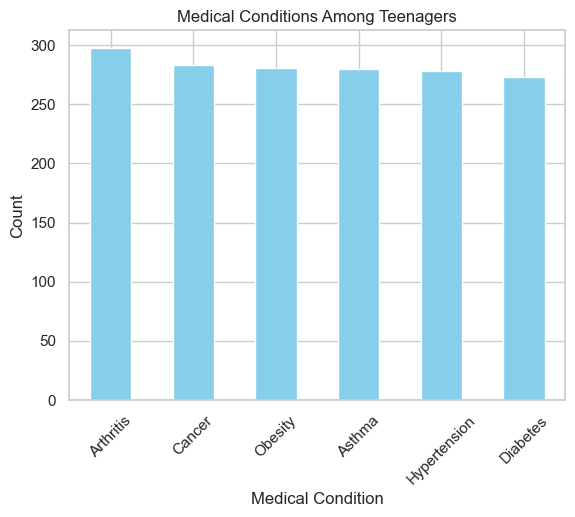

In [6]:
condition_counts = Teens['Medical Condition'].value_counts()
condition_counts.plot(kind='bar', title='Medical Conditions Among Teenagers', color='skyblue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 7. Medical Condition Distribution by Gender

In [16]:
Teens.groupby(["Gender"])["Medical Condition"].value_counts()

Gender  Medical Condition
Female  Arthritis            165
        Hypertension         145
        Asthma               143
        Cancer               141
        Diabetes             141
        Obesity              130
Male    Obesity              151
        Cancer               142
        Asthma               137
        Arthritis            133
        Hypertension         133
        Diabetes             132
Name: count, dtype: int64

### 8. Medication Distribution by Gender

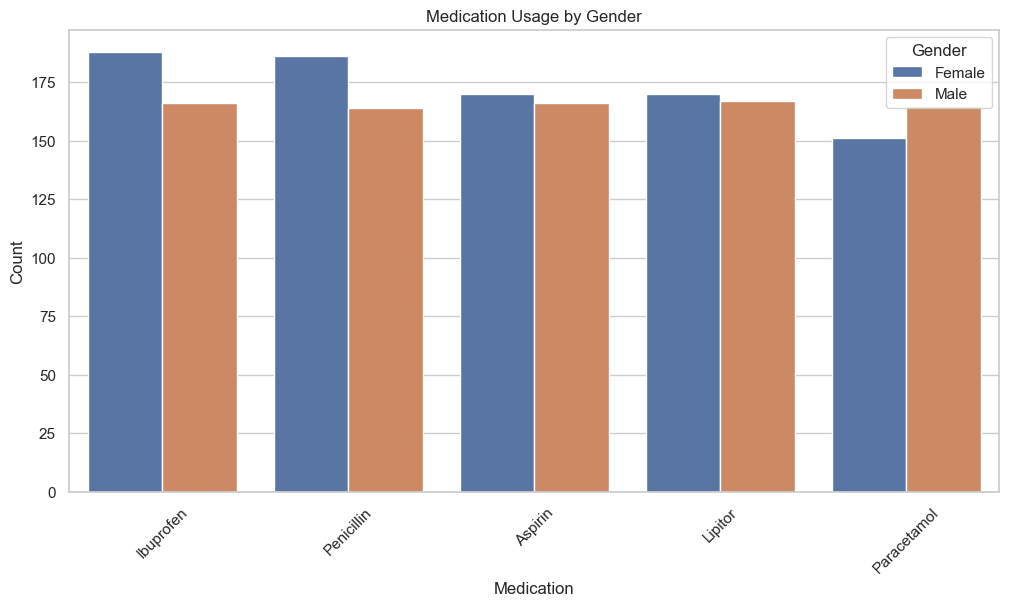

In [7]:
medication = Teens.groupby(['Gender'])['Medication'].value_counts().reset_index(name='Count')
plt.figure(figsize=(12, 6))
sns.barplot(data=medication, x='Medication', y='Count', hue='Gender')
plt.title('Medication Usage by Gender')
plt.xticks(rotation=45)
plt.show()

### 9. Average Billing by Medical Condition

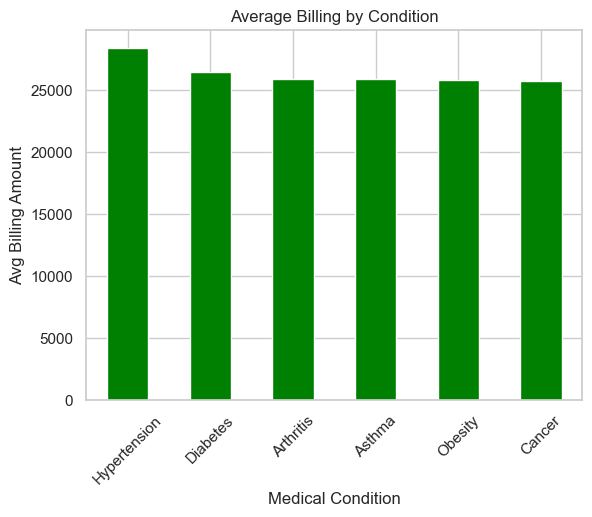

In [8]:
billing_avg = Teens[Teens['Billing Amount'] >= 0].groupby('Medical Condition')['Billing Amount'].mean()
billing_avg.sort_values(ascending=False).plot(kind='bar', color='green', title='Average Billing by Condition')
plt.ylabel('Avg Billing Amount')
plt.xticks(rotation=45)
plt.show()

### 10. Monthly Admission Trends

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_3144\2579970266.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Teens['Admission Month'] = Teens['Date of Admission'].dt.to_period('M').astype(str)


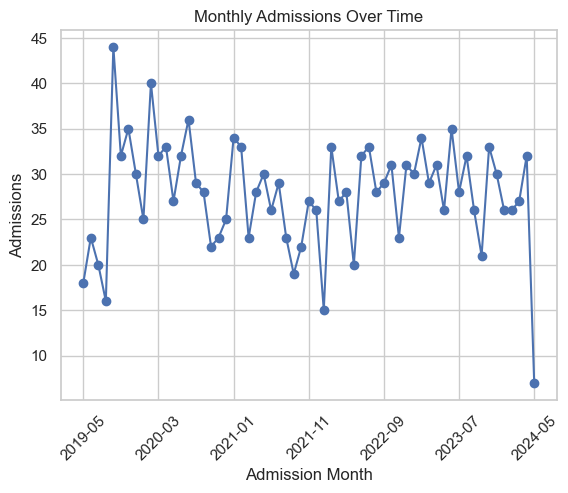

In [9]:
Teens['Admission Month'] = Teens['Date of Admission'].dt.to_period('M').astype(str)
monthly_admissions = Teens.groupby('Admission Month').size()
monthly_admissions.plot(kind='line', marker='o', title='Monthly Admissions Over Time')
plt.ylabel('Admissions')
plt.xticks(rotation=45)
plt.show()

### 11. Length of Stay by Condition

In [10]:
Teens.groupby('Medical Condition')['Duration'].mean().sort_values(ascending=False)

Medical Condition
Hypertension    15.931655
Diabetes        15.890110
Asthma          15.764286
Arthritis       15.332215
Cancer          15.127208
Obesity         14.818505
Name: Duration, dtype: float64

### 12. Blood Type vs Medical Condition Heatmap

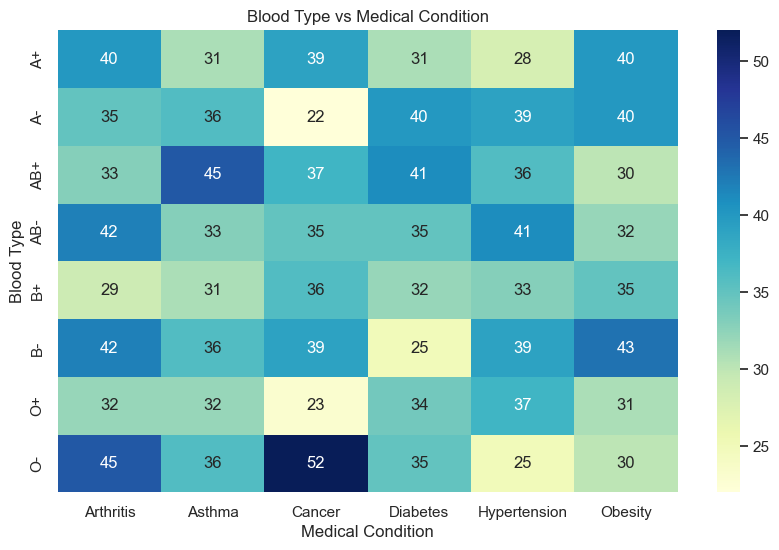

In [13]:
heatmap_data = pd.crosstab(Teens['Blood Type'], Teens['Medical Condition'])
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Blood Type vs Medical Condition')
plt.show()

### 13. Chi-Square Test for Blood Type vs Medical Condition

In [14]:
chi2, p, dof, expected = chi2_contingency(heatmap_data)
print(f'Chi-Square Statistic: {chi2:.2f}')
print(f'P-value: {p:.4f}')

Chi-Square Statistic: 39.36
P-value: 0.2810


## Conclusion

This notebook summarizes the key health trends, cost patterns, and demographic distributions among teenage patients. The insights offer a foundation for further analysis, policy planning, and real-world applications in healthcare analytics.